In [26]:
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import warnings
import statistics 
import lime
from lime import lime_tabular
from random import random 
import shap

In [2]:
train_FE_ssDM = pd.DataFrame(pd.read_csv('C:/Users/kalin/train_FE_ssDM_final.csv'))
test_FE_ssDM = pd.DataFrame(pd.read_csv('C:/Users/kalin/test_FE_ssDM_final.csv'))

In [3]:
train_FE_ssDM= train_FE_ssDM.drop(columns=['Unnamed: 0'])
train_FE_ssDM

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,PREV_PRODUCT_COMBINATION_POS mobile without interest_MEAN,PREV_PRODUCT_COMBINATION_POS other with interest_MEAN,PREV_PRODUCT_COMBINATION_POS others without interest_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN
0,1,0,0,0,-9461,-3648.0,-2120,1,0,1,...,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
1,0,1,0,1,-16765,-1186.0,-291,1,0,1,...,0.0,0.0,0.0,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,0.0
2,0,0,1,0,-19046,-4260.0,-2531,1,1,1,...,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0,1,0,0,-19005,-9833.0,-2437,1,0,1,...,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.714286,0.142857,0.0
4,0,0,0,0,-19932,-4311.0,-3458,1,0,1,...,0.0,0.0,0.0,0.200000,0.000000,0.200000,0.400000,0.200000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252096,0,1,0,0,-16705,-9798.0,-259,1,0,1,...,0.0,0.0,0.0,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.0
252097,0,0,0,1,-9327,-8456.0,-1982,1,0,1,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
252098,0,1,0,0,-14966,-6737.0,-5150,1,0,1,...,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.0
252099,1,1,0,0,-11961,-2562.0,-931,1,0,1,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [4]:
dist_y = train_FE_ssDM['TARGET'].value_counts()
dist_y =pd.DataFrame(dist_y)
dist_y

,TARGET
0,230271
1,21830


<BarContainer object of 2 artists>

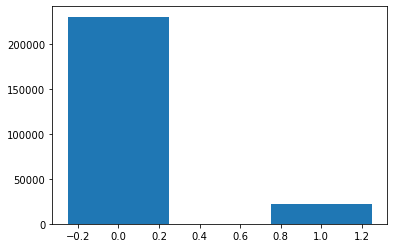

In [5]:
plt.bar(dist_y.index, dist_y.TARGET, width = 0.5)

In [6]:
test_FE_ssDM

,Unnamed: 0,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_PAYMENT_DIFF_MAX,INSTAL_DBD_SUM,INSTAL_DBD_MEAN,INSTAL_DBD_MAX,INSTAL_DPD_SUM,INSTAL_DPD_MEAN,INSTAL_DPD_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE
0,0,0,0,0,-19241,-5170.0,-812,1,0,1,...,0.000000,0.000,0.00,62.0,8.857143,36.0,11.0,1.571429,11.0,2.0
1,1,1,0,0,-18064,-9118.0,-1623,1,0,1,...,0.000000,0.000,0.00,213.0,23.666667,37.0,1.0,0.111111,1.0,2.0
2,2,1,1,0,-20038,-2175.0,-3503,1,0,1,...,1157.662742,179437.725,23147.82,887.0,5.722581,38.0,84.0,0.541935,21.0,3.0
3,3,0,0,0,-13976,-2000.0,-4208,1,0,1,...,622.550708,70348.230,8505.00,369.0,3.265487,19.0,30.0,0.265487,7.0,3.0
4,4,1,1,1,-13040,-4000.0,-4262,1,1,1,...,0.000000,0.000,0.00,147.0,12.250000,18.0,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39454,39465,0,0,0,-19970,-9094.0,-3399,1,1,1,...,0.000000,0.000,0.00,22.0,7.333333,8.0,0.0,0.000000,0.0,2.0
39455,39466,0,0,1,-11186,-3015.0,-3003,1,0,1,...,314.714589,22974.165,9680.49,438.0,6.000000,26.0,38.0,0.520548,19.0,1.0
39456,39467,0,1,0,-15922,-2681.0,-1504,1,0,1,...,0.000000,0.000,0.00,253.0,31.625000,76.0,0.0,0.000000,0.0,2.0
39457,39468,1,0,1,-13968,-1461.0,-1364,1,1,1,...,0.000000,0.000,0.00,211.0,7.275862,15.0,1.0,0.034483,1.0,1.0


In [7]:
test_FE_ssDM= test_FE_ssDM.drop(columns=['Unnamed: 0'])
test_FE_ssDM

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_PAYMENT_DIFF_MAX,INSTAL_DBD_SUM,INSTAL_DBD_MEAN,INSTAL_DBD_MAX,INSTAL_DPD_SUM,INSTAL_DPD_MEAN,INSTAL_DPD_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE
0,0,0,0,-19241,-5170.0,-812,1,0,1,0,...,0.000000,0.000,0.00,62.0,8.857143,36.0,11.0,1.571429,11.0,2.0
1,1,0,0,-18064,-9118.0,-1623,1,0,1,0,...,0.000000,0.000,0.00,213.0,23.666667,37.0,1.0,0.111111,1.0,2.0
2,1,1,0,-20038,-2175.0,-3503,1,0,1,0,...,1157.662742,179437.725,23147.82,887.0,5.722581,38.0,84.0,0.541935,21.0,3.0
3,0,0,0,-13976,-2000.0,-4208,1,0,1,1,...,622.550708,70348.230,8505.00,369.0,3.265487,19.0,30.0,0.265487,7.0,3.0
4,1,1,1,-13040,-4000.0,-4262,1,1,1,0,...,0.000000,0.000,0.00,147.0,12.250000,18.0,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39454,0,0,0,-19970,-9094.0,-3399,1,1,1,1,...,0.000000,0.000,0.00,22.0,7.333333,8.0,0.0,0.000000,0.0,2.0
39455,0,0,1,-11186,-3015.0,-3003,1,0,1,0,...,314.714589,22974.165,9680.49,438.0,6.000000,26.0,38.0,0.520548,19.0,1.0
39456,0,1,0,-15922,-2681.0,-1504,1,0,1,1,...,0.000000,0.000,0.00,253.0,31.625000,76.0,0.0,0.000000,0.0,2.0
39457,1,0,1,-13968,-1461.0,-1364,1,1,1,1,...,0.000000,0.000,0.00,211.0,7.275862,15.0,1.0,0.034483,1.0,1.0


In [8]:
#standardisation des données 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,normalize

# sc = StandardScaler()
# x = sc.fit_transform(train_FE_ssDM.iloc[:,1:])
# y = train_FE_ssDM.iloc[:,0]

In [9]:
sc = StandardScaler()
x = sc.fit_transform(train_FE_ssDM.drop('TARGET', axis=1))
y = train_FE_ssDM[['TARGET']]

# Réequilibrage des données 

In [10]:
#Premier train / test split avant reequilibrage, pour l’instant on ne fera rien avec le test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [11]:
#Reequilibrage (tester plusieurs versions : sans, under, over, etc…)

https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb 
https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28 
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/ 
https://towardsdatascience.com/imbalanced-data-when-details-matter-16bd3ec7ef74 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# sous-echantillonage 

In [12]:
def sous_ech(x_train, y_train): 
    #methode de sous echantillonage
    undersample = RandomUnderSampler(sampling_strategy='majority')

    # sous echantillonage
    x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)
    print("Before undersampling: ", Counter(y_train))
    print("After undersampling: ", Counter(y_train_under))
    return x_train_under, y_train_under

# Sur echantillonage avec SMOTE 

In [13]:
#methode de sur echantillonage
sm = SMOTE(random_state=42)

In [14]:
callable(sm)

False

In [15]:
def sur_ech(x_train, y_train): 
    # sur echantillonage
    x_train_Sur, y_train_Sur = sm.fit_resample(x_train, y_train)

    print("Before oversampling: ",Counter(y_train))
    print("After oversampling: ",Counter(y_train_Sur))
    return x_train_Sur, y_train_Sur

# mélange des deux

In [16]:
def sur_sous(x_train, y_train,ratio_over, ratio_under):
    over = SMOTE(sampling_strategy=ratio_over)
    under = RandomUnderSampler(sampling_strategy=ratio_under)
    
    print("before oversampling: ",Counter(y_train))
    x_train_Sur2, y_train_Sur2 = over.fit_resample(x_train, y_train)
    print("After oversampling: ",Counter(y_train_Sur2))
    
    print("before undersampling: ",Counter(y_train_Sur2))
    x_train_sur_under, y_train_sur_under = under.fit_resample(x_train_Sur2, y_train_Sur2)
    print("After undersampling: ",Counter(y_train_under))
    return x_train_sur_under, y_train_sur_under

# “Train / test split” pour faire train / validation split.

In [17]:
#sous echantillonage

x_train_under, y_train_under = sous_ech(x_train, y_train)

Before undersampling:  Counter({'TARGET': 1})
After undersampling:  Counter({'TARGET': 1})


In [18]:
#Train / validation split
x_train2_under,x_val_under,y_train2_under,y_val_under = train_test_split(x_train_under,y_train_under,
                                                                         test_size = 0.3,random_state=0)

In [19]:
#sur echantillonage 

x_train_Sur, y_train_Sur = sur_ech(x_train, y_train)

Before oversampling:  Counter({'TARGET': 1})
After oversampling:  Counter({'TARGET': 1})


In [20]:
#Train / validation split
x_train2_Sur,x_val_Sur,y_train2_Sur,y_val_Sur = train_test_split(x_train_Sur,y_train_Sur,
                                                                         test_size = 0.3,random_state=0)

In [21]:
#les deux

In [22]:
x_train_sur_under, y_train_sur_under= sur_sous(x_train, y_train,0.5,1)

before oversampling:  Counter({'TARGET': 1})
After oversampling:  Counter({'TARGET': 1})
before undersampling:  Counter({'TARGET': 1})
After undersampling:  Counter({'TARGET': 1})


In [23]:
x_train_both,x_val_both,y_train_both,y_val_both = train_test_split(x_train_sur_under, y_train_sur_under, 
                                                                   test_size = 0.3,random_state=0)

# Test du modele de logistic regression (baseline) sur des donnees équilibrées

In [27]:
def benchmarck(x_train, y_train,x_val,y_val):
    modeles ={'lr' : LogisticRegression(solver='lbfgs', max_iter=500)}
#'gaussianNB': GaussianNB(),#'KNClassifier ' : KNeighborsClassifier(), #'RandomForest ' : RandomForestClassifier()
    
    with tqdm(total=len(modeles)) as pbar: #barre pour le temps d'execution
                
        for cle, valeur in modeles.items(): 
            valeur.fit(x_train, y_train)
            y_pred = valeur.predict(x_val)
            cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=valeur.classes_)
            results = classification_report(y_val, y_pred, labels=[0,1])
            #N, train_score, val_score, =learning_curve(valeur, x_train, cv=4 ,scoring='f1', train_sizes=np.linspace(0.1,1,10)) #utilise la cross validation
            print(results)
            disp.plot()
            plt.show()
            #plt.plot(N, train_score.mean(axis=1), label='train_score')
            #plt.plot(N, val_score.mean(axis=1), label='validation_score')
            #plt.legend()
            pbar.update
    
    #result = pd.DataFrame({'modele': modeles.values() , 'cnf_matrix':cnf_matrixs , 'cross_val':cross_vals})
    #return(result)

  0%|          | 0/1 [00:00<?, ?it/s]A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.67      0.70      0.68      4519
           1       0.69      0.67      0.68      4666

    accuracy                           0.68      9185
   macro avg       0.68      0.68      0.68      9185
weighted avg       0.68      0.68      0.68      9185



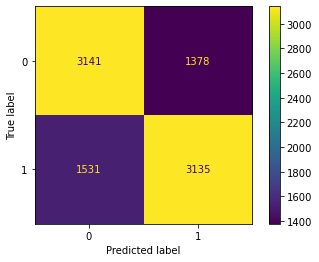

  0%|          | 0/1 [00:02<?, ?it/s]


In [28]:
#sur données sous-echantillonées  

benchmarck(x_train2_under,y_train2_under,x_val_under,y_val_under)

  0%|          | 0/1 [00:00<?, ?it/s]A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.74      0.71      0.72     48653
           1       0.72      0.74      0.73     48045

    accuracy                           0.73     96698
   macro avg       0.73      0.73      0.73     96698
weighted avg       0.73      0.73      0.73     96698



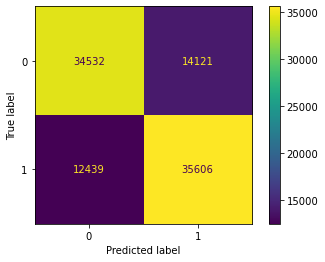

  0%|          | 0/1 [00:24<?, ?it/s]


In [29]:
#sur données sur-echantillonées  

benchmarck(x_train2_Sur,y_train2_Sur,x_val_Sur,y_val_Sur)

  0%|          | 0/1 [00:00<?, ?it/s]A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.72      0.71      0.72     23965
           1       0.72      0.73      0.72     24384

    accuracy                           0.72     48349
   macro avg       0.72      0.72      0.72     48349
weighted avg       0.72      0.72      0.72     48349



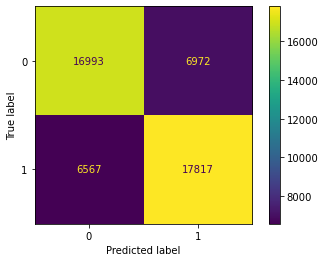

  0%|          | 0/1 [00:09<?, ?it/s]


In [30]:
#sur données sur et sous échantillonées 
benchmarck(x_train_both,y_train_both, x_val_both,y_val_both)

# Cross validation 

# Stratified kflod sur données deséquilibrées 

In [31]:
x_train.shape

(176470, 311)

In [32]:
y_train.shape

(176470, 1)

In [33]:
y_train.isnull().sum()

TARGET    0
dtype: int64

In [34]:
y_train.value_counts()

TARGET
0         161163
1          15307
dtype: int64

In [35]:
y_train

,TARGET
118285,0
8158,0
212990,0
205381,0
46289,0
...,...
176963,0
117952,0
173685,0
43567,0


In [36]:
x_train = pd.DataFrame(x_train,index=y_train.index)
x_train

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,310
118285,0.777261,-0.773726,-0.688326,-0.056259,0.689205,0.678788,0.006899,-0.566776,0.046159,1.612899,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,-0.566403,-0.477806,-0.55276,-0.556392,-0.557438
8158,-1.286569,1.292447,-0.688326,-0.635360,0.383564,1.436361,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,3.388832,-0.477806,-0.55276,-0.556392,-0.557438
212990,0.777261,-0.773726,-0.688326,-2.041749,-0.850993,-0.887170,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,0.665352,0.563664,0.147429,-0.55276,-0.556392,0.659327
205381,-1.286569,1.292447,-0.688326,0.591920,0.922587,-0.460211,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,4.709549,-0.046258,-0.557821,-0.553661,3.388832,-0.477806,-0.55276,-0.556392,-0.557438
46289,0.777261,-0.773726,-0.688326,-0.838223,-1.701807,1.004782,0.006899,-0.566776,0.046159,1.612899,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,-0.566403,-0.477806,-0.55276,-0.556392,-0.557438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,-1.286569,-0.773726,-0.688326,1.201055,0.040102,-0.155994,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,-0.566403,-0.477806,-0.55276,-0.556392,-0.557438
117952,-1.286569,-0.773726,1.452801,0.645434,-2.131980,0.522391,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,0.868521,0.752009,-0.477806,-0.55276,0.868664,-0.557438
173685,-1.286569,-0.773726,-0.688326,0.226330,1.392118,-1.220423,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,-0.566403,3.898841,-0.55276,-0.556392,-0.557438
43567,-1.286569,1.292447,-0.688326,1.704526,0.406933,1.054935,0.006899,-0.566776,0.046159,-0.620002,...,2.154644,-0.168274,-0.046258,-0.557821,-0.553661,1.411215,1.710517,-0.55276,-0.556392,-0.557438


In [37]:
print(x_train.index.values)
print(y_train.index.values)

[118285   8158 212990 ... 173685  43567 199340]
[118285   8158 212990 ... 173685  43567 199340]


In [38]:
 #### stratified kfold sur données sous Sous-echantillonées (x_train_under, y_train_under)
skf = StratifiedKFold(n_splits=5)   


for train_index, valid_index  in skf.split(x_train, y_train):
    print(train_index.shape, valid_index.shape)
    print('train:',train_index, 'validation:', valid_index)
    x_train_strat, x_val_strat  = x_train.iloc[train_index], x_train.iloc[valid_index]
    y_train_strat, y_val_strat  = y_train.iloc[train_index], y_train.iloc[valid_index]
    

(141176,) (35294,)
train: [ 35280  35295  35296 ... 176467 176468 176469] validation: [    0     1     2 ... 35292 35293 35294]
(141176,) (35294,)
train: [     0      1      2 ... 176467 176468 176469] validation: [35280 35295 35296 ... 70594 70595 70596]
(141176,) (35294,)
train: [     0      1      2 ... 176467 176468 176469] validation: [ 70502  70504  70511 ... 106005 106006 106007]
(141176,) (35294,)
train: [     0      1      2 ... 176467 176468 176469] validation: [104797 104818 104821 ... 141204 141205 141206]
(141176,) (35294,)
train: [     0      1      2 ... 141204 141205 141206] validation: [140795 140805 140833 ... 176467 176468 176469]


In [39]:
y_train.iloc[train_index]



,TARGET
118285,0
8158,0
212990,0
205381,0
46289,0
...,...
118061,0
174546,0
121296,0
198092,0


In [40]:

def benchmarck_stratkfold(x_train, y_train):
    skf = StratifiedKFold(n_splits=5)
    modeles ={'lr' : LogisticRegression(solver='lbfgs', max_iter=500)}
#'gaussianNB': GaussianNB(),#'KNClassifier ' : KNeighborsClassifier(), #'RandomForest ' : RandomForestClassifier()
    
    with tqdm(total=len(modeles)) as pbar: #barre pour le temps d'execution
                
        for cle, valeur in modeles.items(): 
            for train_index, valid_index in skf.split(x_train, y_train):

                x_train_strat, x_val_strat  = x_train.iloc[train_index], x_train.iloc[valid_index]
                y_train_strat, y_val_strat  = y_train.iloc[train_index], y_train.iloc[valid_index]
                             
                valeur.fit(x_train_strat, y_train_strat)
                y_pred = valeur.predict(x_val_strat)
                cnf_matrix = metrics.confusion_matrix(y_val_strat, y_pred)
                disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=valeur.classes_)
                results = classification_report(y_val_strat, y_pred, labels=[0,1])
                #N, train_score, val_score, =learning_curve(valeur, x_train, cv=4 ,scoring='f1', train_sizes=np.linspace(0.1,1,10)) #utilise la cross validation
                #moyenne des results , ne pas ecraser result
            print(results)
            disp.plot()
            plt.show()
                #plt.plot(N, train_score.mean(axis=1), label='train_score')
                #plt.plot(N, val_score.mean(axis=1), label='validation_score')
                #plt.legend()
            pbar.update

    #result = pd.DataFrame({'modele': modeles.values() , 'cnf_matrix':cnf_matrixs , 'cross_val':cross_vals})
    #return(result)

  0%|          | 0/1 [00:00<?, ?it/s]A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     32232
           1       0.44      0.02      0.04      3062

    accuracy                           0.91     35294
   macro avg       0.68      0.51      0.50     35294
weighted avg       0.87      0.91      0.88     35294



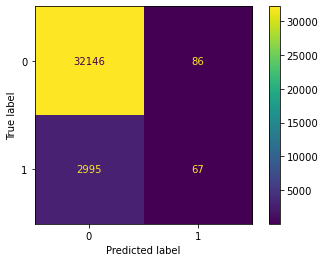

  0%|          | 0/1 [01:03<?, ?it/s]


In [41]:
#echantillon initial
benchmarck_stratkfold(x_train,y_train)

In [42]:
#sous-echantillonage
x_train_under, y_train_under = sous_ech(x_train, y_train)

Before undersampling:  Counter({'TARGET': 1})
After undersampling:  Counter({'TARGET': 1})


In [43]:
x_train_under

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,310
0,0.777261,-0.773726,-0.688326,-0.014758,-0.827009,-0.851535,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,3.388832,-0.477806,-0.552760,-0.556392,-0.557438
1,0.777261,-0.773726,1.452801,-1.147841,-2.094466,1.526769,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,-0.566403,-0.477806,-0.552760,-0.556392,-0.557438
2,0.777261,1.292447,-0.688326,0.687481,0.295008,0.983665,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,1.030102,-0.020343,-0.071998,0.616355,-0.552760,-0.556392,-0.025103
3,0.777261,-0.773726,1.452801,-1.110982,-2.046498,1.447580,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,1.579612,-0.566403,-0.477806,-0.552760,-0.556392,1.571901
4,0.777261,-0.773726,1.452801,-0.947709,-0.925097,0.666250,0.006899,1.764364,0.046159,1.612899,...,-0.181321,-0.168274,-0.046258,-0.557821,0.512975,-0.566403,-0.477806,1.585662,0.512400,-0.557438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30609,0.777261,-0.773726,-0.688326,-0.410381,-1.332823,-0.891130,0.006899,1.764364,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,0.618418,-0.079601,-0.346668,-0.234659,1.348059,-0.318883,-0.557438
30610,-1.286569,1.292447,1.452801,1.747119,0.426612,1.147322,0.006899,-0.566776,0.046159,1.612899,...,-0.181321,-0.168274,-0.046258,1.559410,-0.553661,-0.566403,1.710517,-0.552760,-0.556392,-0.557438
30611,0.777261,-0.773726,-0.688326,0.436291,0.013351,1.359812,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,3.676642,-0.553661,-0.566403,-0.477806,-0.552760,-0.556392,-0.557438
30612,0.777261,-0.773726,-0.688326,0.111656,-0.782116,-0.489906,0.006899,1.764364,0.046159,1.612899,...,-0.181321,-0.168274,-0.046258,3.676642,-0.553661,-0.566403,-0.477806,-0.552760,-0.556392,-0.557438


In [44]:
y_train_under

,TARGET
0,0
1,0
2,0
3,0
4,0
...,...
30609,1
30610,1
30611,1
30612,1


  0%|          | 0/1 [00:00<?, ?it/s]A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.69      0.71      0.70      3061
           1       0.70      0.68      0.69      3061

    accuracy                           0.69      6122
   macro avg       0.69      0.69      0.69      6122
weighted avg       0.69      0.69      0.69      6122



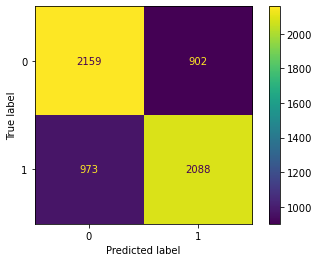

  0%|          | 0/1 [00:09<?, ?it/s]


In [45]:
benchmarck_stratkfold(x_train_under, y_train_under)

In [46]:
#sur-echantillonage

x_train_SMOTE, y_train_SMOTE = sur_ech(x_train, y_train)

Before oversampling:  Counter({'TARGET': 1})
After oversampling:  Counter({'TARGET': 1})


In [47]:
x_train_SMOTE

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,310
0,0.777261,-0.773726,-0.688326,-0.056259,0.689205,0.678788,0.006899,-0.566776,0.046159,1.612899,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,-0.566403,-0.477806,-0.55276,-0.556392,-0.557438
1,-1.286569,1.292447,-0.688326,-0.635360,0.383564,1.436361,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,3.388832,-0.477806,-0.55276,-0.556392,-0.557438
2,0.777261,-0.773726,-0.688326,-2.041749,-0.850993,-0.887170,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,0.665352,0.563664,0.147429,-0.55276,-0.556392,0.659327
3,-1.286569,1.292447,-0.688326,0.591920,0.922587,-0.460211,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,4.709549,-0.046258,-0.557821,-0.553661,3.388832,-0.477806,-0.55276,-0.556392,-0.557438
4,0.777261,-0.773726,-0.688326,-0.838223,-1.701807,1.004782,0.006899,-0.566776,0.046159,1.612899,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,-0.566403,-0.477806,-0.55276,-0.556392,-0.557438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322321,-1.286569,-0.773726,-0.060239,0.622783,-0.073411,-0.441565,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.060960,1.152958,-0.007405,-0.221034,-0.55276,-0.556392,0.646330
322322,-0.019069,-0.773726,-0.688326,1.473637,1.170302,0.835449,0.006899,1.764364,0.046159,0.751333,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,0.648150,-0.477806,0.76055,-0.556392,-0.557438
322323,-1.286569,-0.773726,-0.688326,0.922279,1.078037,0.976520,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,-0.566403,-0.477806,1.44191,-0.556392,0.435661
322324,-0.457258,-0.773726,-0.688326,-0.500647,-0.051313,0.305706,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.135667,-0.553661,-0.566403,-0.041477,-0.55276,2.440139,-0.132870


In [48]:
y_train_SMOTE

,TARGET
0,0
1,0
2,0
3,0
4,0
...,...
322321,1
322322,1
322323,1
322324,1


  0%|          | 0/1 [00:00<?, ?it/s]A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.74      0.71      0.72     32232
           1       0.72      0.75      0.74     32233

    accuracy                           0.73     64465
   macro avg       0.73      0.73      0.73     64465
weighted avg       0.73      0.73      0.73     64465



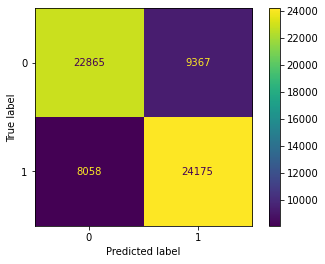

  0%|          | 0/1 [02:14<?, ?it/s]


In [49]:
benchmarck_stratkfold(x_train_SMOTE, y_train_SMOTE)

In [50]:
#sur et sous echantillonage 0.5/1

x_train_sur_under, y_train_sur_under= sur_sous(x_train, y_train,0.5, 1)

before oversampling:  Counter({'TARGET': 1})
After oversampling:  Counter({'TARGET': 1})
before undersampling:  Counter({'TARGET': 1})
After undersampling:  Counter({'TARGET': 1})


In [51]:
x_train_sur_under

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,310
0,0.777261,-0.773726,-0.688326,-1.104429,-2.217768,0.282844,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,2.400023,0.616355,-0.552760,-0.556392,-0.557438
1,-1.286569,1.292447,-0.688326,0.655809,0.676906,0.498634,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,0.868521,0.752009,-0.477806,0.872854,-0.556392,-0.557438
2,0.777261,-0.773726,-0.688326,0.852392,-0.290138,1.676567,0.006899,1.764364,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,-0.553661,-0.566403,-0.477806,-0.552760,3.718775,-0.557438
3,0.777261,-0.773726,-0.688326,-1.436163,-1.315912,-0.406098,0.006899,1.764364,0.046159,1.612899,...,-0.181321,-0.168274,-0.046258,0.047102,-0.553661,-0.566403,-0.477806,2.502128,-0.556392,0.050944
4,-1.286569,1.292447,-0.688326,1.822203,1.082172,1.350574,0.006899,-0.566776,0.046159,1.612899,...,-0.181321,-0.168274,-0.046258,1.861872,-0.553661,-0.001369,-0.477806,0.058218,0.054346,-0.557438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161157,0.777261,-0.773726,-0.688326,-1.135619,0.597587,0.367780,0.006899,-0.566776,0.046159,1.612899,...,-0.181321,-0.168274,-0.046258,0.095830,-0.334127,0.800666,-0.252607,-0.552760,0.921257,-0.338308
161158,0.777261,1.155701,-0.546618,-0.339647,-1.159692,-0.867711,0.006899,-0.566776,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.557821,1.438425,0.356963,0.616355,-0.481996,-0.414919,-0.557438
161159,-1.286569,-0.773726,1.393842,0.688263,-0.388082,-1.247818,0.006899,1.764364,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.166813,0.217497,0.878937,-0.477806,-0.552760,0.594274,-0.164194
161160,0.777261,-0.773726,-0.688326,0.591525,0.984787,0.120454,0.006899,0.627651,0.046159,-0.620002,...,-0.181321,-0.168274,-0.046258,-0.463489,0.129621,-0.566403,0.534023,0.072883,0.658430,0.106666


In [52]:
y_train_sur_under

,TARGET
0,0
1,0
2,0
3,0
4,0
...,...
161157,1
161158,1
161159,1
161160,1


  0%|          | 0/1 [00:00<?, ?it/s]A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.73      0.70      0.72     16116
           1       0.71      0.74      0.73     16116

    accuracy                           0.72     32232
   macro avg       0.72      0.72      0.72     32232
weighted avg       0.72      0.72      0.72     32232



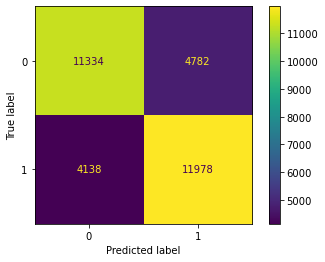

  0%|          | 0/1 [01:01<?, ?it/s]


In [53]:
benchmarck_stratkfold(x_train_sur_under, y_train_sur_under)

In [54]:
#sur et sous echantillonage 0.3/1

x_train_sur_under2, y_train_sur_under2= sur_sous(x_train, y_train,0.3, 1)

before oversampling:  Counter({'TARGET': 1})
After oversampling:  Counter({'TARGET': 1})
before undersampling:  Counter({'TARGET': 1})
After undersampling:  Counter({'TARGET': 1})


  0%|          | 0/1 [00:00<?, ?it/s]A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.74      0.70      0.72      9669
           1       0.72      0.75      0.73      9670

    accuracy                           0.73     19339
   macro avg       0.73      0.73      0.73     19339
weighted avg       0.73      0.73      0.73     19339



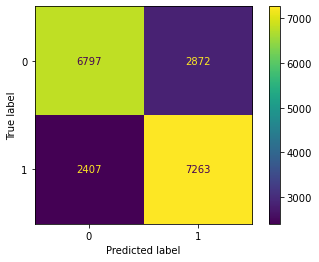

  0%|          | 0/1 [00:34<?, ?it/s]


In [55]:
benchmarck_stratkfold(x_train_sur_under2, y_train_sur_under2)

In [56]:
#sur et sous echantillonage 0.8/1

x_train_sur_under3, y_train_sur_under3= sur_sous(x_train, y_train,0.8, 1)

before oversampling:  Counter({'TARGET': 1})
After oversampling:  Counter({'TARGET': 1})
before undersampling:  Counter({'TARGET': 1})
After undersampling:  Counter({'TARGET': 1})


  0%|          | 0/1 [00:00<?, ?it/s]A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expecte

              precision    recall  f1-score   support

           0       0.74      0.71      0.72     25786
           1       0.72      0.75      0.73     25786

    accuracy                           0.73     51572
   macro avg       0.73      0.73      0.73     51572
weighted avg       0.73      0.73      0.73     51572



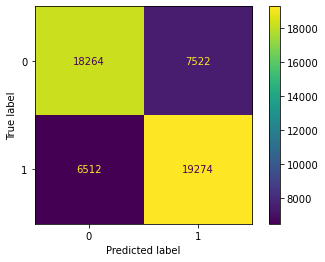

  0%|          | 0/1 [01:47<?, ?it/s]


In [57]:
benchmarck_stratkfold(x_train_sur_under3, y_train_sur_under3)

In [58]:
#metrics et matrice de confusion : https://www.aquiladata.fr/insights/comment-gerer-le-desequilibre-des-classes-dans-un-jeu-de-donnees/

# Tous les modèles 
On choisi le surechantillonage avec un straified kflod

## Stratified kfold

In [59]:
import inspect 
from sklearn.naive_bayes import ComplementNB 

In [60]:
inspect.getsource(benchmarck_stratkfold)

"def benchmarck_stratkfold(x_train, y_train):\n    skf = StratifiedKFold(n_splits=5)\n    modeles ={'lr' : LogisticRegression(solver='lbfgs', max_iter=500)}\n#'gaussianNB': GaussianNB(),#'KNClassifier ' : KNeighborsClassifier(), #'RandomForest ' : RandomForestClassifier()\n    \n    with tqdm(total=len(modeles)) as pbar: #barre pour le temps d'execution\n                \n        for cle, valeur in modeles.items(): \n            for train_index, valid_index in skf.split(x_train, y_train):\n\n                x_train_strat, x_val_strat  = x_train.iloc[train_index], x_train.iloc[valid_index]\n                y_train_strat, y_val_strat  = y_train.iloc[train_index], y_train.iloc[valid_index]\n                             \n                valeur.fit(x_train_strat, y_train_strat)\n                y_pred = valeur.predict(x_val_strat)\n                cnf_matrix = metrics.confusion_matrix(y_val_strat, y_pred)\n                disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_l

In [61]:
#'ComplementNB':ComplementNB() , 
def benchmarck_stratkfold(x_train, y_train):
    skf = StratifiedKFold(n_splits=5)
    modeles ={'lr' : LogisticRegression(max_iter=500),
              'gaussianNB': GaussianNB(),
              'KNClassifier ' : KNeighborsClassifier(),
              'RandomForest ' : RandomForestClassifier(n_estimators=50, max_depth=5),
              #'SVM': SVC(kernel='rbf'),
              'Gboost' : GradientBoostingClassifier()}
    
    with tqdm(total=len(modeles)*5) as pbar: #barre pour le temps d'execution
        
        for model_name, model_func in modeles.items():
            print(model_name)
            
            for train_index, valid_index in skf.split(x_train, y_train):
                
                x_train_strat, x_val_strat  = x_train.iloc[train_index], x_train.iloc[valid_index]
                y_train_strat, y_val_strat  = y_train.iloc[train_index], y_train.iloc[valid_index]
               
                #model= model_func()
                model_func.fit(x_train_strat, np.ravel(y_train_strat))
                y_pred = model_func.predict(x_val_strat)
                cnf_matrix = metrics.confusion_matrix(y_val_strat, y_pred)
                disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model_func.classes_)
                results = classification_report(y_val_strat, y_pred, labels=[0,1])
                #N, train_score, val_score = learning_curve(valeur, x_train, y_train,
                #cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))
                pbar.update() 
                
            print(results)
            disp.plot()
            plt.show()
            #plt.figure(figsize=(12, 8))
            #plt.plot(N, train_score.mean(axis=1), label='train_score')
            #plt.plot(N, val_score.mean(axis=1), label='validation_score')
            #plt.legend()
             


  0%|          | 0/25 [00:00<?, ?it/s]

lr


 20%|██        | 5/25 [02:16<09:22, 28.12s/it]

              precision    recall  f1-score   support

           0       0.74      0.71      0.72     32232
           1       0.72      0.75      0.74     32233

    accuracy                           0.73     64465
   macro avg       0.73      0.73      0.73     64465
weighted avg       0.73      0.73      0.73     64465



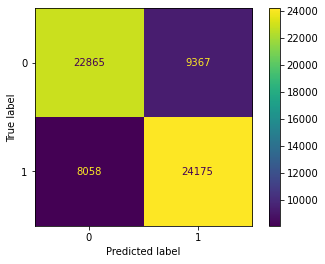

gaussianNB


 40%|████      | 10/25 [05:18<10:46, 43.07s/it]

              precision    recall  f1-score   support

           0       0.73      0.14      0.24     32232
           1       0.53      0.95      0.68     32233

    accuracy                           0.55     64465
   macro avg       0.63      0.55      0.46     64465
weighted avg       0.63      0.55      0.46     64465



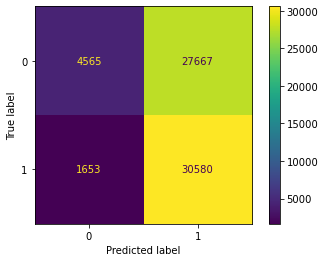

KNClassifier 


 60%|██████    | 15/25 [49:33<1:15:56, 455.62s/it]

              precision    recall  f1-score   support

           0       1.00      0.33      0.50     32232
           1       0.60      1.00      0.75     32233

    accuracy                           0.67     64465
   macro avg       0.80      0.67      0.63     64465
weighted avg       0.80      0.67      0.63     64465



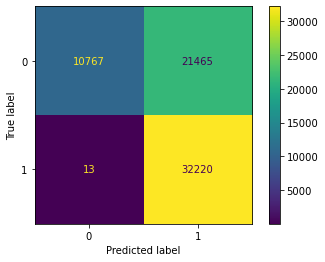

RandomForest 


 80%|████████  | 20/25 [52:52<09:07, 109.53s/it]  

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     32232
           1       0.83      0.91      0.87     32233

    accuracy                           0.86     64465
   macro avg       0.87      0.86      0.86     64465
weighted avg       0.87      0.86      0.86     64465



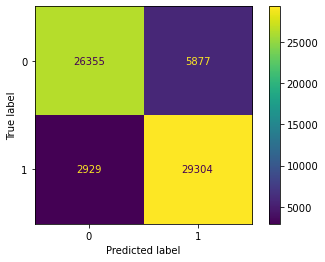

Gboost


100%|██████████| 25/25 [2:06:08<00:00, 725.43s/it]

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     32232
           1       0.99      1.00      0.99     32233

    accuracy                           0.99     64465
   macro avg       0.99      0.99      0.99     64465
weighted avg       0.99      0.99      0.99     64465



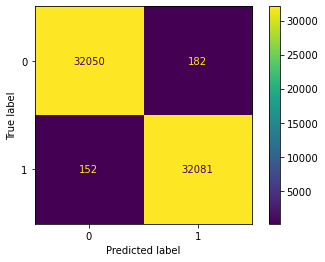

100%|██████████| 25/25 [2:06:08<00:00, 302.75s/it]


In [62]:
benchmarck_stratkfold(x_train_SMOTE, y_train_SMOTE)

# Grid search
How to optimise hyper parameters of a Logistic Regression Model using GridSearchCV in Python
https://www.youtube.com/watch?v=eET7kAtE1kw

In [ ]:
#grid search randomforest 

rfc=RandomForestClassifier()
skf = StratifiedKFold(n_splits=5)
param_grid = { 
'n_estimators': [25, 50, 100],
'min_samples_split':[2,4,6], 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,10,15],
'criterion' :['gini', 'entropy']
}
    
for train_index, valid_index in skf.split(x_train_SMOTE, y_train_SMOTE):

    x_train_strat, x_val_strat  = x_train_SMOTE.iloc[train_index], x_train_SMOTE.iloc[valid_index]
    y_train_strat, y_val_strat  = y_train_SMOTE.iloc[train_index], y_train_SMOTE.iloc[valid_index]
    
   
    #rfc.fit(x_train_strat,np.ravel(y_train_strat))
    gridS=GridSearchCV(rfc,param_grid, cv=5,n_jobs=-1)    
    gridS_results=gridS.fit(x_train_strat, np.ravel(y_train_strat))    
    y_pred=gridS.predict(x_val_strat)
    
    cnf_matrix = metrics.confusion_matrix(y_val_strat, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=gridS_results.classes_)
    results = classification_report(y_val_strat, y_pred, labels=[0,1])

print("best hyperparameters:",gridS_results.best_params_)
print("best estimator:",gridS_results.best_estimator_)
print(results)
